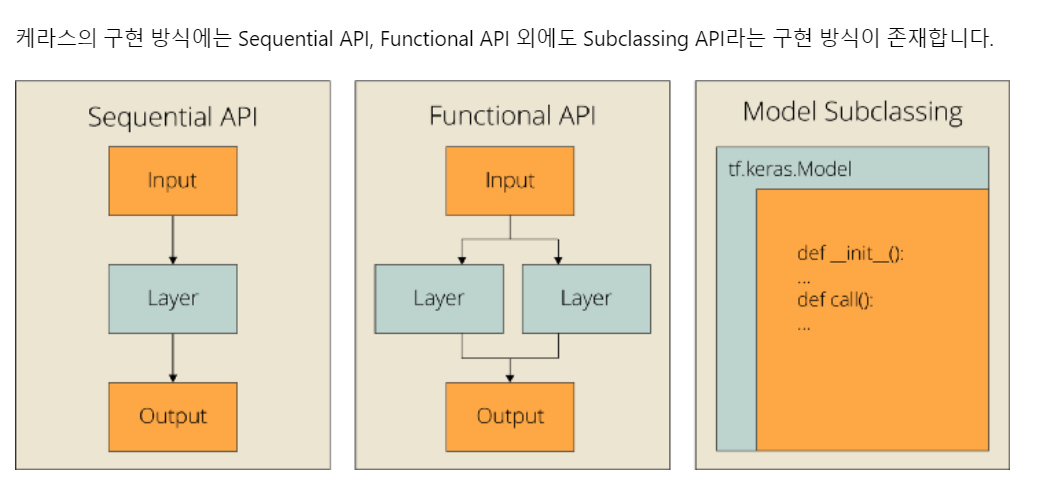

### 1. Sequential API

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim = 4, activation = 'softmax'))

### 2. Functional API

## 1) 전결합 FFNN

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))

In [ ]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation = 'relu')(inputs) # <- connect
hidden2 = Dense(64, activation = 'relu')(hidden1) # <- connect
output = Dense(1, activation = 'sigmoid')(hidden2) # <- connect
model = Model(inputs = inputs, outputs = output) # <- connect

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])

In [ ]:
inputs = Input(shape =(10,))
x = Dense(8, activation = 'relu')(inputs)
x = Dense(4, activation = 'relu')(x)
x = Dense(1, activation = 'linear')(x)
model = Model(inputs,x)

2) 선형 회귀(Linear Regression) -Fuctional API

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

In [ ]:
X = [1,2,3,4,5,6,7,8,9] # study hour
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # score

inputs = Input(shape=(1,))
output = Dense(1, activation = 'linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr = 0.01) # lr is learning rate

linear_model.compile(optimizer = sgd, loss = 'mse', metrics=['mse'])
linear_model.fit(X,y, epochs = 300)

### 2) 선형 회귀(Linear Regression) - Keras API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X = [1,2,3,4,5,6,7,8,9] # study hour
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # score

model = Sequential()

# output dim is 1. input dim is 1 too.
# activation is 'linear'
model.add(Dense(1,input_dim = 1, activation = 'linear'))

# sgd is Stochastic Gradient Descent 
sgd = optimizers.SGD(lr = 0.01)

# loss function is mse
model.compile(optimizer = sgd, loss = 'mse', metrics=['mse'])

# we will set the epoch = 300
model.fit(X, y, epochs=300)

In [ ]:
# After modeling, we will draw the line
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

### 3) 로지스틱 회귀(Logistic Regression) - Functional

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape = (3,))
output = Dense(1, activation = 'sigmoid')(inputs)
logistic_model = Model(inputs, output)

### 4) 다중 입력을 받는 모델(model that accepts multiple inputs)

In [ ]:
from cycler import concat
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Define two inputs
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# Define 1st Neural Network
X = Dense(16, activation = 'relu')(inputA)
X = Dense(8, activation = 'relu')(X)
X = Model(inputs = inputA, outputs = X)

# Denfine 2nd Neural Network
y = Dense(64, activation = 'relu')(inputB)
y = Dense(32, activation = 'relu')(y)
y = Dense(64, activation = 'relu')(y)
y = Model(inputs = inputB, outputs = y)

# we will connect two Neural Network(concatenate)
result = concatenate([X.output, y.output])


z = Dense(2, activation = 'relu')(result)
z = Dense(1, activation = 'linear')(z)

model = Model(inputs = [X.input, y.input], outputs = z)

In [ ]:
model.summary()

5) RNN(은닉층 사용하기)

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
X = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation = 'sigmoid')(X)

model = Model(inputs = inputs, outputs = output)

In [ ]:
model.summary()

## result = Dense(128) == 
# dense = Dense(128)
# result = dense(input)

## 위의 두 문장은 같다